In [27]:
import drjit as dr
import mitsuba as mi
import numpy as np
import matplotlib.pyplot as plt

mi.set_variant("llvm_ad_rgb")

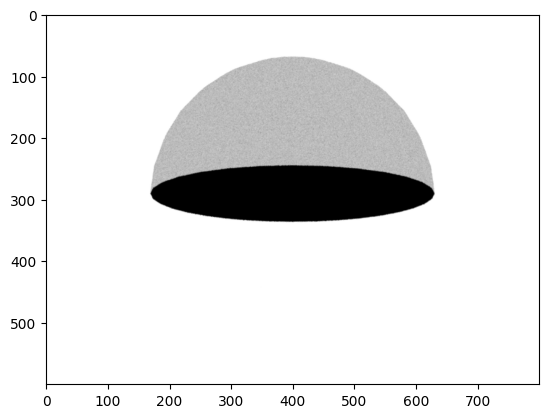

In [61]:
# front facing
scene = mi.load_dict({
    "type": "scene",
    "integrator": {"type": "path"},
    "light": {"type": "constant", "radiance": {"type": "rgb", "value": [1, 1, 1]}},
    "sensor": {
        "type": "perspective",
        "to_world": mi.ScalarTransform4f().look_at(
            origin=[0, -1, 5],   
            target=[0, 0, 0],    
            up=[0, 1, 0]    
        ),

        "film": {"type": "hdrfilm", "width": 800, "height": 600, "pixel_format": "rgb"},
    },
    "dome": {"type": "obj", "filename": "dome.obj"},
})

img = mi.render(scene)
plt.imshow(mi.util.convert_to_bitmap(img))
plt.show()


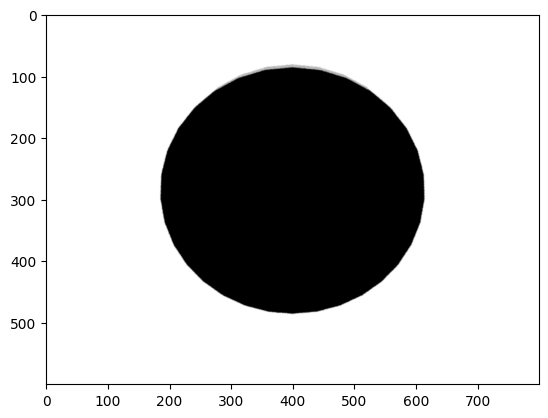

In [ ]:
# Bottom-up
import mitsuba as mi
import matplotlib.pyplot as plt

mi.set_variant('scalar_rgb')

scene = mi.load_dict({
    "type": "scene",
    "integrator": {"type": "volpath"},  # Better for small light sources

    "sensor": {
        "type": "perspective",
        "to_world": mi.ScalarTransform4f().look_at(
            origin=[0, -5, -2], 
            target=[0, 0, 0],    
            up=[0, 1, 0]
        ),
        "film": {"type": "hdrfilm", "width": 800, "height": 600, "pixel_format": "rgb"},
    },

    # Point light inside the dome
    "light": {
        "type": "point",
        "position": [0, 0, 1],  # Slightly above center
        "intensity": {
            "type": "rgb",
            "value": [20, 20, 20]  # Bright light to ensure visibility
        }
    },

    # Load your dome model
    "dome": {"type": "obj", "filename": "dome.obj"},
})

# Render and display the result
img = mi.render(scene)
plt.imshow(mi.util.convert_to_bitmap(img))
plt.axis('off')
plt.show()

# scene = mi.load_dict({
#     "type": "scene",
#     "integrator": {"type": "path"},
#     "light": {"type": "constant", "radiance": {"type": "rgb", "value": [1, 1, 1]}},
#     "sensor": {
#         "type": "perspective",
#         "to_world": mi.ScalarTransform4f().look_at(
#             origin=[0, -5, -2], 
#             target=[0, 0, 0],    
#             up=[0, 1, 0]
#         ),
#         "film": {"type": "hdrfilm", "width": 800, "height": 600, "pixel_format": "rgb"},
#     },

#     "dome": {"type": "obj", "filename": "dome.obj"},
# })

# img = mi.render(scene)
# plt.imshow(mi.util.convert_to_bitmap(img))
# plt.show()
